| Variable Name                  | Role   | Type        | Demographic                                        | Description                                                                                   | Units | Missing Values |
|--------------------------------|--------|-------------|----------------------------------------------------|-----------------------------------------------------------------------------------------------|-------|----------------|
| Gender                         | Feature| Categorical | Gender                                             |                                                                                               |       | no             |
| Age                            | Feature| Continuous  | Age                                                |                                                                                               |       | no             |
| Height                         | Feature| Continuous  |                                                    |                                                                                               |       | no             |
| Weight                         | Feature| Continuous  |                                                    |                                                                                               |       | no             |
| family_history_with_overweight| Feature| Binary      |                                                    | Has a family member suffered or suffers from overweight?                                      |       | no             |
| FAVC                           | Feature| Binary      |                                                    | Do you eat high caloric food frequently?                                                      |       | no             |
| FCVC                           | Feature| Integer     |                                                    | Do you usually eat vegetables in your meals?                                                  |       | no             |
| NCP                            | Feature| Continuous  |                                                    | How many main meals do you have daily?                                                        |       | no             |
| CAEC                           | Feature| Categorical |                                                    | Do you eat any food between meals?                                                            |       | no             |
| SMOKE                          | Feature| Binary      |                                                    | Do you smoke?                                                                                 |       | no             |
| CH2O                           | Feature| Continuous  |                                                    | How much water do you drink daily?                                                           |       | no             |
| SCC                            | Feature| Binary      |                                                    | Do you monitor the calories you eat daily?                                                    |       | no             |
| FAF                            | Feature| Continuous  |                                                    | How often do you have physical activity?                                                     |       | no             |
| TUE                            | Feature| Integer     |                                                    | How much time do you use technological devices such as cell phone, videogames, television, computer and others? |       | no             |
| CALC                           | Feature| Categorical |                                                    | How often do you drink alcohol?                                                              |       | no             |
| MTRANS                         | Feature| Categorical |                                                    | Which transportation do you usually use?                                                      |       | no             |
| NObeyesdad                     | Target | Categorical |                                                    | Obesity level                                                                                |       | no             |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


import joblib

2024-04-04 06:58:42.103098: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-04 06:58:42.104095: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-04 06:58:42.118022: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-04 06:58:42.277444: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 06:58:43.193141: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [5]:
df = pd.read_csv("/home/surajprajapati/Documents/Hackthonpring24/playground-series-s4e2/train.csv")

In [6]:
# df = pd.read_csv("ObesityDataSet_raw.csv")
print(df.shape)
df.head()

(20758, 18)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
unique_values_counts = df['NObeyesdad'].value_counts()
unique_values_counts

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [79]:
# df.drop(['Height', 'Weight'], axis=1, inplace=True)

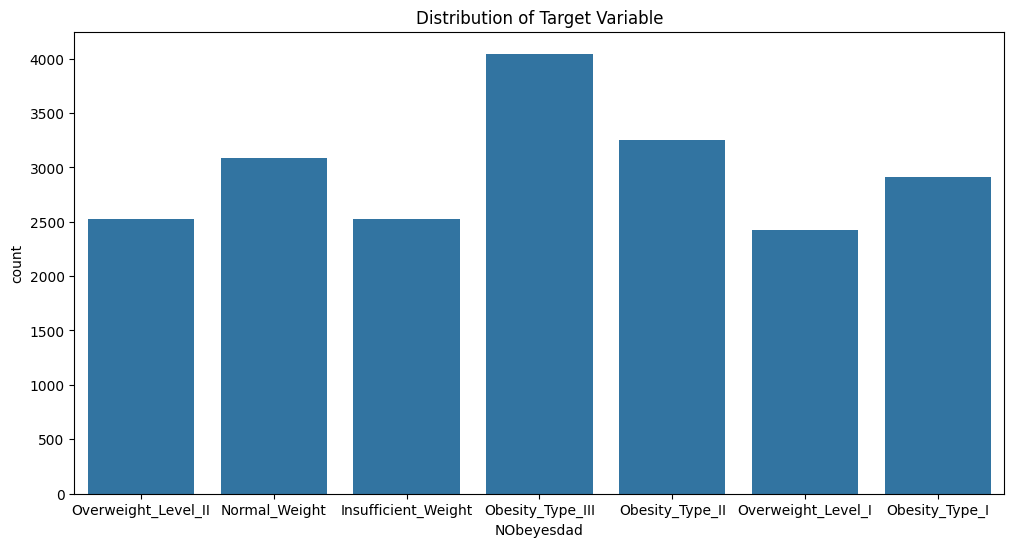

In [8]:

plt.figure(figsize=(12, 6))
sns.countplot(x="NObeyesdad", data=df)
plt.title("Distribution of Target Variable")
plt.show()

In [9]:
cat_features = df.select_dtypes(include = ['object'])
cat_features.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [10]:
cat_features

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,yes,yes,Frequently,no,no,no,Automobile,Normal_Weight
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Insufficient_Weight
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
20753,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,no,yes,Frequently,no,no,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,yes,yes,Sometimes,no,no,no,Public_Transportation,Obesity_Type_II
20756,Male,yes,yes,Sometimes,no,no,no,Automobile,Overweight_Level_II


In [11]:
for i in cat_features:
    print(f"{i} : {df[i].unique()}")

Gender : ['Male' 'Female']
family_history_with_overweight : ['yes' 'no']
FAVC : ['yes' 'no']
CAEC : ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE : ['no' 'yes']
SCC : ['no' 'yes']
CALC : ['Sometimes' 'no' 'Frequently']
MTRANS : ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad : ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [12]:
le = LabelEncoder()
for i in cat_features:
    df[i] = le.fit_transform(df[i])

In [13]:
for i in cat_features:
    print(f"{i} : {df[i].unique()}")

Gender : [1 0]
family_history_with_overweight : [1 0]
FAVC : [1 0]
CAEC : [2 1 3 0]
SMOKE : [0 1]
SCC : [0 1]
CALC : [1 2 0]
MTRANS : [3 0 4 2 1]
NObeyesdad : [6 1 0 4 3 5 2]


<Axes: >

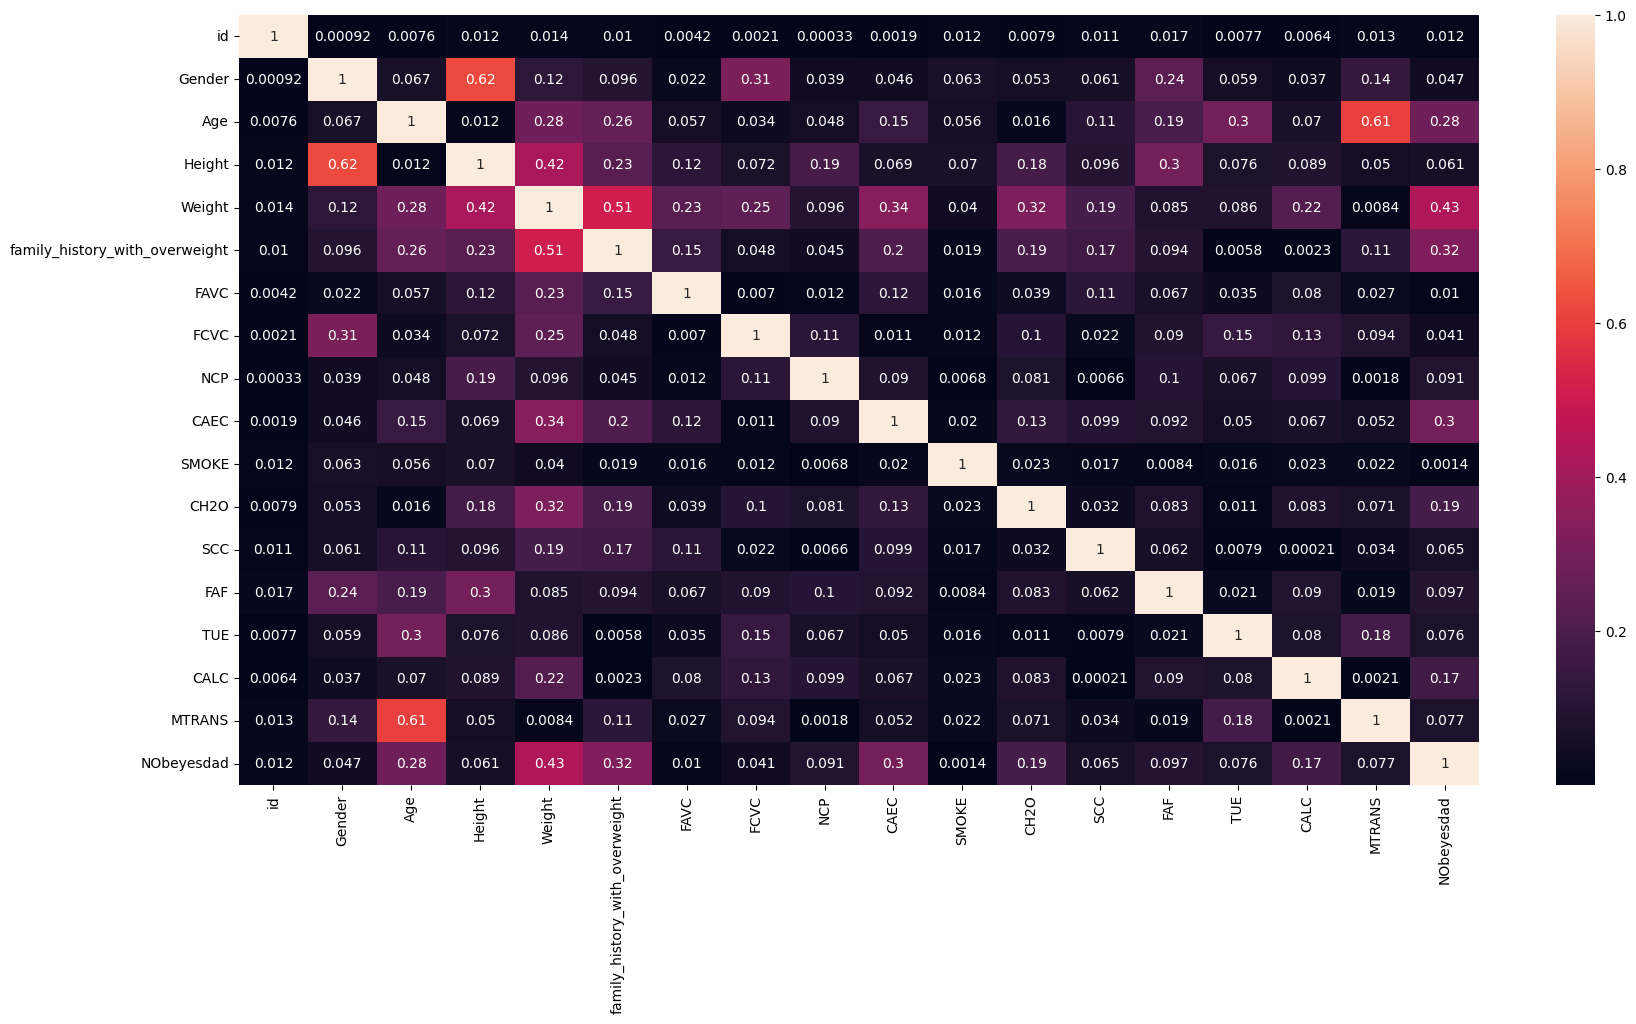

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [16]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6


In [17]:
X = df.drop('NObeyesdad', axis=1) 
y = df['NObeyesdad']

# RandomForestClassifier

In [18]:
# scaler = StandardScaler()
scaler = MinMaxScaler()

RFclassifier = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RFclassifier.fit(X_train_scaled, y_train)

y_pred = RFclassifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8945086705202312


In [90]:
# Save the trained model to a file
joblib.dump(RFclassifier, 'RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']

In [91]:
y_pred = RFclassifier.predict([[1.        , 0.17021277, 0.43754268, 0.12622076, 1.        ,
       1.        , 0.5       , 0.66666667, 0.66666667, 0.        ,
       0.5       , 0.        , 0.        , 1.        , 0.66666667,
       0.        ]])

y_pred

array([1])

# ANN

In [92]:
cv_scores_train = []
cv_scores_test = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model_ANN = Sequential()
    model_ANN.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model_ANN.add(Dense(64, activation='relu'))
    model_ANN.add(Dense(7, activation='softmax'))

    model_ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_ANN.fit(X_train_scaled, y_train, epochs=40, batch_size=45, verbose=0)

    train_score = model_ANN.evaluate(X_train_scaled, y_train, verbose=0)[1]  # Accuracy is at index 1
    test_score = model_ANN.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Accuracy is at index 1

    cv_scores_train.append(train_score)
    cv_scores_test.append(test_score)

mean_cv_score_train = np.mean(cv_scores_train)
print(f"Mean Cross-Validation Training Accuracy: {mean_cv_score_train}")
mean_cv_score_test = np.mean(cv_scores_test)
print(f"Mean Cross-Validation Testing Accuracy: {mean_cv_score_test}")


/home/surajprajapati/Documents/Hackthonpring24/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/surajprajapati/Documents/Hackthonpring24/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/surajprajapati/Documents/Hackthonpring24/ObesityForecast.com/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. Wh

Mean Cross-Validation Training Accuracy: 0.9991113841533661
Mean Cross-Validation Testing Accuracy: 0.9385342836380005


In [93]:
cv_scores_train

[0.9994075894355774,
 0.9982227683067322,
 1.0,
 0.9988151788711548,
 0.9988151788711548,
 0.9994075894355774,
 0.9988151788711548,
 0.9994075894355774,
 1.0,
 0.9982227683067322]

In [94]:
cv_scores_test

[0.9479905366897583,
 0.9456264972686768,
 0.9290780425071716,
 0.9385342597961426,
 0.9527186751365662,
 0.9598108530044556,
 0.9290780425071716,
 0.9503546357154846,
 0.9172576665878296,
 0.914893627166748]

# LogisticRegression

In [19]:
cv_scores_train = []
cv_scores_test = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(max_iter=1000, penalty="l2", solver="saga")
    scaler = StandardScaler()
    
    model.fit(X_train_scaled, y_train)

    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)

    cv_scores_train.append(train_score)
    cv_scores_test.append(test_score)

mean_cv_score = np.mean(cv_scores_train)
print(f"Mean Cross-Validation Training Accuracy: {mean_cv_score}")

mean_cv_score = np.mean(cv_scores_test)
print(f"Mean Cross-Validation Testing Accuracy: {mean_cv_score}")

Mean Cross-Validation Training Accuracy: 0.8566843309647115
Mean Cross-Validation Testing Accuracy: 0.8550818882466281


In [96]:
print(cv_scores_train)
print(cv_scores_test)

[0.8998815165876777, 0.8975118483412322, 0.8981042654028436, 0.9040284360189573, 0.9022511848341233, 0.8963270142180095, 0.9004739336492891, 0.8998815165876777, 0.9046208530805687, 0.8992890995260664]
[0.8628841607565012, 0.8628841607565012, 0.8723404255319149, 0.8605200945626478, 0.8770685579196218, 0.8817966903073287, 0.8652482269503546, 0.8888888888888888, 0.8888888888888888, 0.8794326241134752]
